In [1]:
# very important! run this cell. it will allow you to import our python classes.

import sys
from pathlib import Path
sys.path.append(str(Path().cwd().parent))

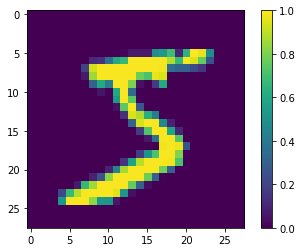

In [2]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


threshold = False

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# normalize dataset
# source: https://www.tensorflow.org/quantum/tutorials/mnist
x_train, x_test = x_train[..., np.newaxis] / 255.0, x_test[..., np.newaxis] / 255.0

#    apply threshold
if threshold:
    black_or_white = np.vectorize(lambda x : 0 if x < 0.5 else 1)
    x_train = black_or_white(x_train)
    x_test = black_or_white(x_test)
# x_test = black_or_white(x_test)

plt.imshow(x_train[0, :, :, 0])
plt.colorbar()
plt.show()

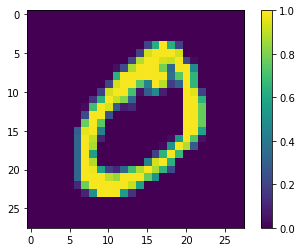

In [3]:
plt.imshow(x_train[1, :, :, 0])
plt.colorbar()
plt.show()

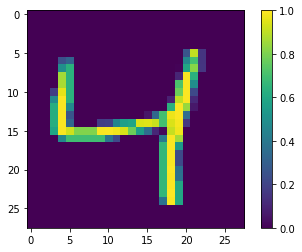

In [4]:
plt.imshow(x_train[2, :, :, 0])
plt.colorbar()
plt.show()

There is not a big different between 0.4, 0.5, 0.6 

In [5]:
import pandas as pd

df_train = pd.DataFrame( x_train[:, :, :, 0].reshape(x_train[:, :, :, 0].shape[0], 28*28))
df_train["label"] = y_train
# df_test = pd.DataFrame( x_test[:, :, :, 0].reshape(x_test[:, :, :, 0].shape[0], 28*28))
# df_test["label"] = y_test

# df = pd.concat([df_train, df_test])
# df.reset_index(inplace=True, drop=True)
X_train = df_train.drop(['label'], axis=1)
y_train = df_train['label']

In [6]:
# Random Shifts
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot


# shifting

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation


In [9]:
from preprocess.get_data import aquire_data
from run import data_preprocess_params

train, test = aquire_data(**data_preprocess_params)

[5]


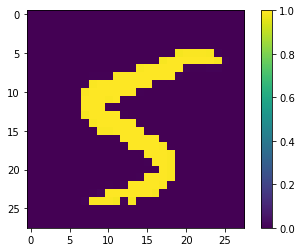

In [10]:
for x,y in train:
    print(y)
    plt.imshow(x.reshape(28, 28))
    plt.colorbar()
    plt.show()
    break